In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Data Cleaning 

### Load Data

In [2]:
# Directory name
dirname = 'yzv311e_term_project_fall_24_25'

# Read the data from the files
pdcategory_df = pd.read_csv(os.path.join(dirname,'product_category_map.csv'))
pdcatalog_df = pd.read_csv(os.path.join(dirname,'product_catalog.csv'))
transactions_df = pd.read_csv(os.path.join(dirname,'transactions.csv'))
test_df = pd.read_csv(os.path.join(dirname,'test.csv'))

In [3]:
# Recursive function to find the grandparent category for abstract categories
def find_grandparent(category_id, parent_id):
    temp = pdcategory_df[pdcategory_df['category_id'] == parent_id]['parent_category_id'].values[0]

    if temp == 3898:  # If parent is the root, stop traversal
        return parent_id
    
    parent_id = temp
    return find_grandparent(category_id, parent_id)


# Iterate through all rows and compute grandparent categories
for i in range(len(pdcategory_df)):
    category_id = pdcategory_df['category_id'][i]
    parent_id = pdcategory_df['parent_category_id'][i]
    if parent_id == 3898:  # If already at the root, assign as the highest level
        pdcategory_df.loc[i, 'highest_level'] = category_id
        continue
    grandparent_id = find_grandparent(category_id, parent_id)
    pdcategory_df.loc[i, 'highest_level'] = grandparent_id

# Convert 'highest_level' column to integer for consistency
pdcategory_df.highest_level = pdcategory_df.highest_level.astype(int)

# Count the categories at the highest level and display the top 10
pdcategory_df.value_counts('highest_level')[:10]


highest_level
2364    1112
2346     247
3624     240
2793     219
252      162
2231     160
275      104
1062     100
678       88
1677      85
Name: count, dtype: int64

In [12]:
# Display the pdcategory_df after adding the highest_level column
pdcategory_df

,category_id,parent_category_id,highest_level
0,0,75,2364
1,1,1499,2723
2,2,1082,2231
3,3,3498,2364
4,4,1623,1825
...,...,...,...
4327,4295,3898,4295
4328,4296,3898,4296
4329,4297,3898,4297
4330,4298,3898,4298


In [28]:
# count when highest_level value_counts is 1 
(pdcategory_df.value_counts('highest_level') == 1).sum()

422

### Handle Missing Values in attributes 1-5


In [13]:
# This function shows the nans in the attributes of the pdcatalog_df
def show_nans(df):
    for att in df.columns:
        print(f"Number of NaN values in {att}: {(df[att]==-1).sum()}")

In [18]:
# This function fills the NaN values in the attribute att with the most frequent value of the fill_att 
def fill_nan(df, att,fill_att):
    # Fill the NaN values in the attribute att with the most frequent value of the fill_att
    nan_idx = df[df[att] == -1].index

    for idx in nan_idx:
        att2 = df.loc[idx, fill_att] 
        fill_value = df[(df[fill_att]==att2)][att].value_counts().idxmax()
        # If the fill value is -1, then fill it with the second most frequent value

        if fill_value == -1:
            fill_value = df[(df[fill_att]==att2)][att].value_counts().index[1]

        df.loc[idx, att] = fill_value
    

In [19]:
# Show the NaN values in the dataset before filling
show_nans(pdcatalog_df)

Number of NaN values in product_id: 0
Number of NaN values in manufacturer_id: 1
Number of NaN values in attribute_1: 4
Number of NaN values in attribute_2: 0
Number of NaN values in attribute_3: 466
Number of NaN values in attribute_4: 617
Number of NaN values in attribute_5: 4264
Number of NaN values in categories: 0


In [8]:
# Fill the NaN values in the dataset with the most frequent value of the attribute_2
fill_nan(pdcatalog_df, 'attribute_1', 'attribute_2')
fill_nan(pdcatalog_df, 'attribute_3', 'attribute_2')
fill_nan(pdcatalog_df, 'attribute_4', 'attribute_2')
fill_nan(pdcatalog_df, 'attribute_5', 'attribute_2')

# Show the NaN values in the dataset after filling
show_nans(pdcatalog_df)

Number of NaN values in product_id: 0
Number of NaN values in manufacturer_id: 1
Number of NaN values in attribute_1: 0
Number of NaN values in attribute_2: 0
Number of NaN values in attribute_3: 0
Number of NaN values in attribute_4: 0
Number of NaN values in attribute_5: 0
Number of NaN values in categories: 0


### Visualize The Attributes After Filling

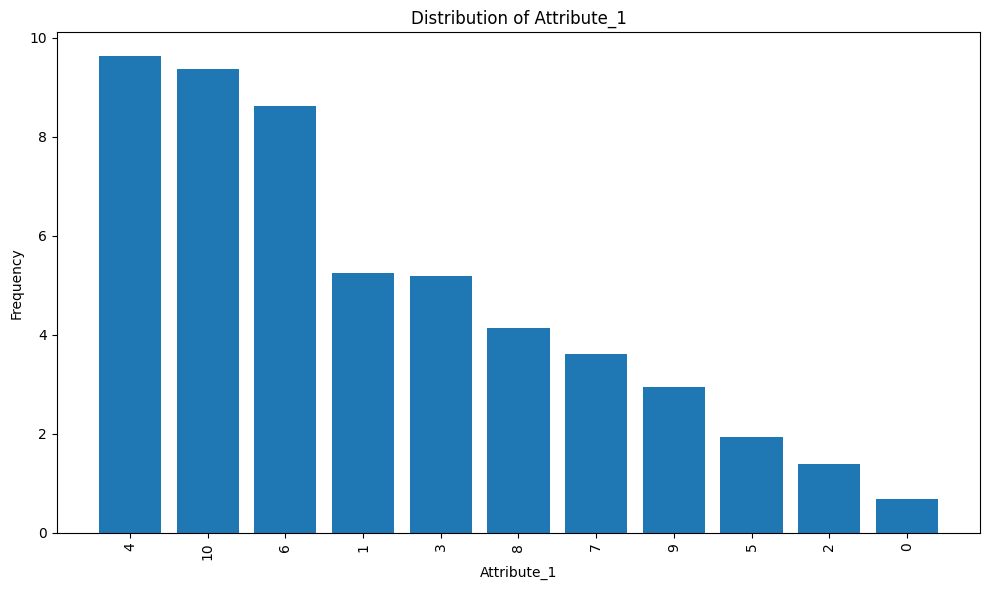

In [9]:
att_counts = pdcatalog_df['attribute_1'].value_counts()

# Plot the distribution of attribute_1
plt.figure(figsize=(10, 6))  
plt.bar(range(len(att_counts)), np.log(att_counts.values)) 
plt.xticks(range(len(att_counts)), att_counts.index, rotation=90)  

plt.xlabel("Attribute_1")
plt.ylabel("Frequency")
plt.title("Distribution of Attribute_1")

plt.tight_layout() 
plt.show()

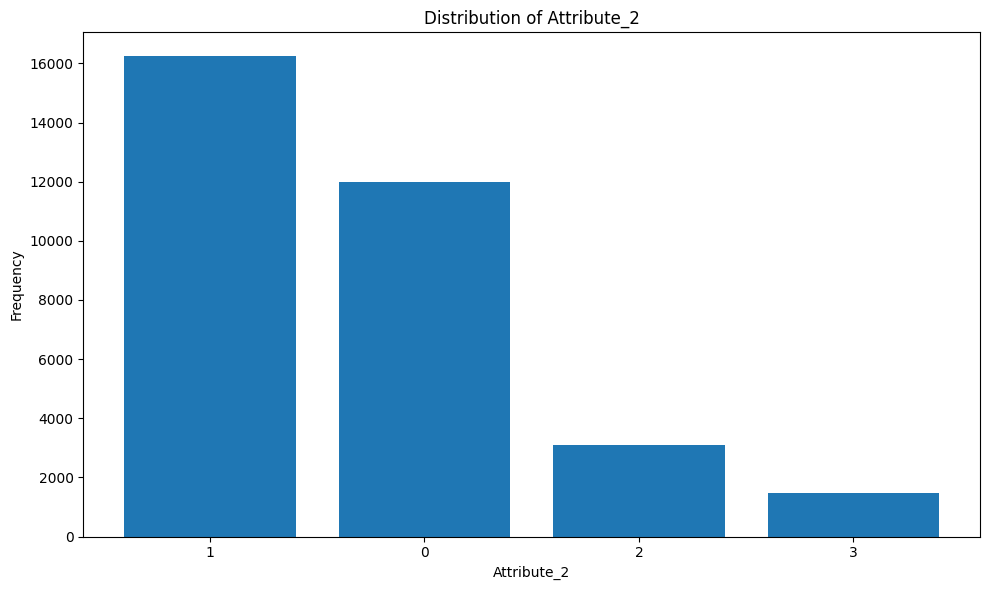

In [10]:
att_counts = pdcatalog_df['attribute_2'].value_counts()

# Plot the distribution of attribute_2
plt.figure(figsize=(10, 6))  
plt.bar(range(len(att_counts)), att_counts.values) 
plt.xticks(range(len(att_counts)), att_counts.index)  

plt.xlabel("Attribute_2")
plt.ylabel("Frequency")
plt.title("Distribution of Attribute_2")

plt.tight_layout() 
plt.show()

Number of unique values in attribute_3: 539


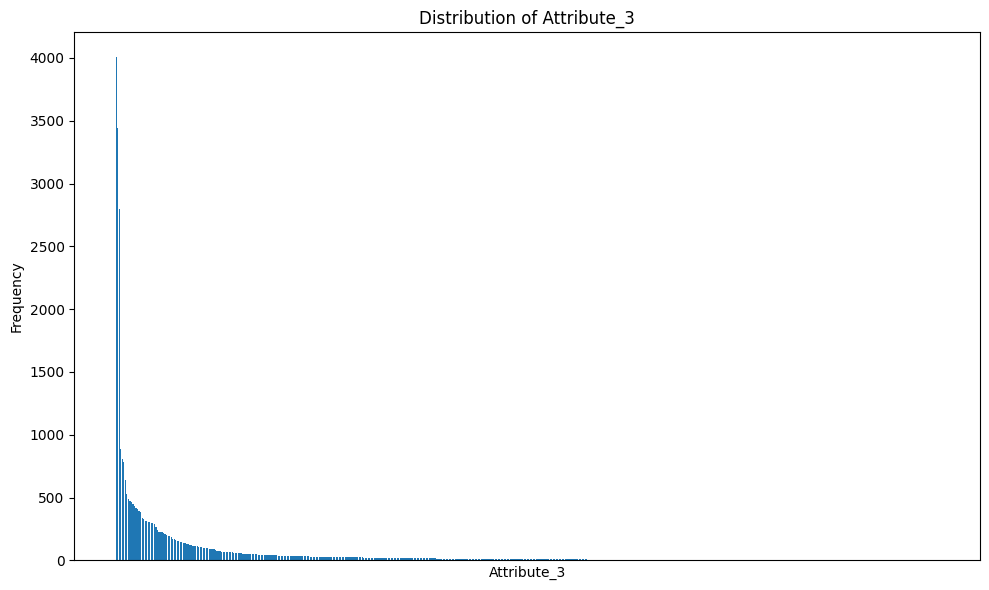

In [11]:
att_counts = pdcatalog_df['attribute_3'].value_counts()
print(f"Number of unique values in attribute_3: {len(att_counts)}")
# Plot the distribution of attribute_3
plt.figure(figsize=(10, 6))  
plt.bar(range(len(att_counts)), att_counts.values) 
plt.xticks(range(len(att_counts)), att_counts.index, rotation=90)  

# Remove the x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel("Attribute_3")
plt.ylabel("Frequency")
plt.title("Distribution of Attribute_3")

plt.tight_layout() 
plt.show()

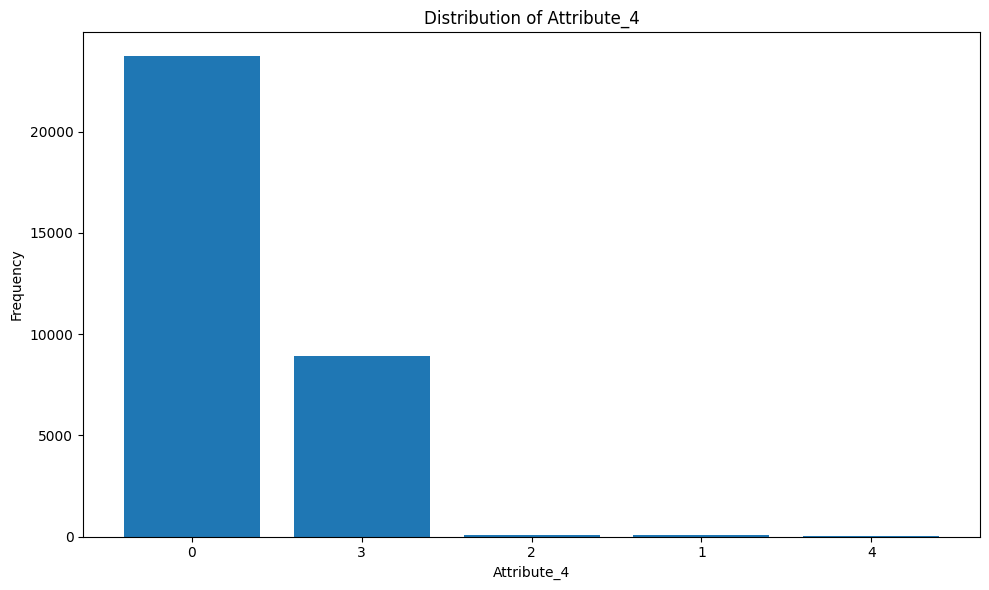

In [12]:
att_counts = pdcatalog_df['attribute_4'].value_counts()

# Plot the distribution of attribute_4
plt.figure(figsize=(10, 6))  
plt.bar(range(len(att_counts)), att_counts.values) 
plt.xticks(range(len(att_counts)), att_counts.index)  

plt.xlabel("Attribute_4")
plt.ylabel("Frequency")
plt.title("Distribution of Attribute_4")

plt.tight_layout() 
plt.show()

Number of unique values in attribute_5: 191


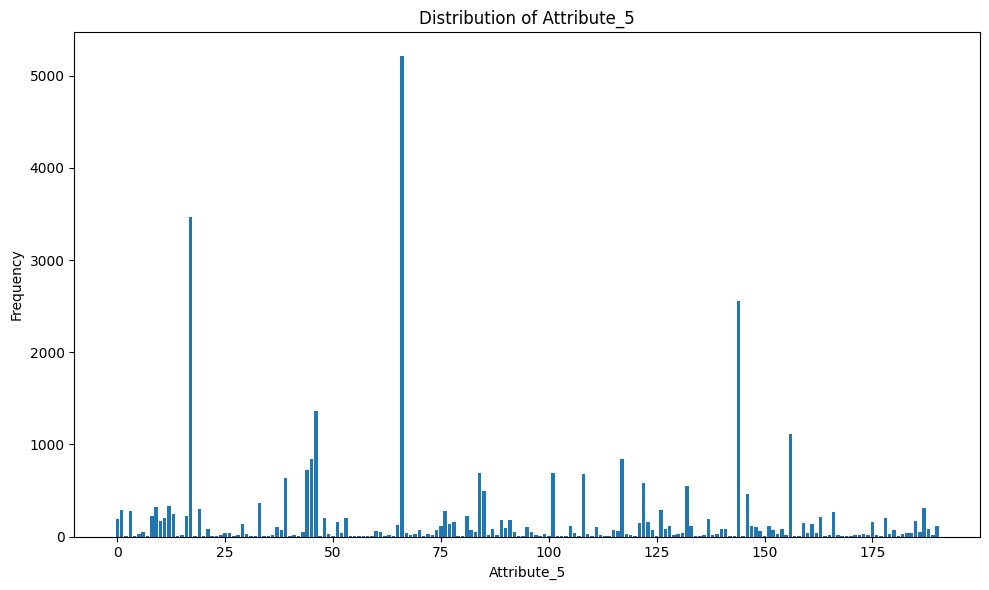

In [13]:
att_counts = pdcatalog_df['attribute_5'].value_counts()
print(f"Number of unique values in attribute_5: {len(att_counts)}")
# Plot the distribution of the attribute_5
plt.figure(figsize=(10, 6))  
plt.bar(att_counts.index, att_counts.values)

plt.xlabel("Attribute_5")
plt.ylabel("Frequency")
plt.title("Distribution of Attribute_5")

plt.tight_layout() 
plt.show()

### Fill the missing values in Categories column

In [20]:
print(f"Number of NaN values in category is {pdcatalog_df.categories.isna().sum()}.")
print(f"Number of products in the category is {pdcatalog_df.product_id.nunique()}.")



Number of NaN values in category is 6788.
Number of products in the category is 32776.


In [21]:
import ast
# Safely parse 'categories' column into lists
def safe_parse_categories(x):
    try:
        # Use ast.literal_eval to safely convert string to list
        return ast.literal_eval(x)
    
    except (ValueError, SyntaxError):
        return np.nan

# Apply parsing function to convert string to list
pdcatalog_df['categories'] = pdcatalog_df['categories'].apply(safe_parse_categories)

print(pdcatalog_df['categories'].apply(type).value_counts())  # Verify types

categories
<class 'list'>     25988
<class 'float'>     6788
Name: count, dtype: int64


In [22]:
# This function fills the NaN values in the categories column with the threshold of overlapping categories based on the attributes
def fill_categories_with_threshold(df, attribute, categories_col, threshold=0.1):
    # Copy the dataframe to avoid modifying the original
    df = df.copy()

    # Group by attributes
    grouped = df.groupby([attribute])
    # Process each group
    for _, group in grouped:
        # Collect valid categories (non-NaN) within the group
        valid_categories = group[categories_col].dropna()

        # Flatten categories into a single list
        all_categories = [cat for sublist in valid_categories for cat in sublist]

        # Count occurrences of each category
        category_counts = pd.Series(all_categories).value_counts()

        
        min_count = int(len(valid_categories) * threshold)

        # Select categories that meet the threshold
        selected_categories = category_counts[category_counts >= min_count].index.tolist()
        
        # Fill missing values with the selected categories
        for idx in group[group[categories_col].isnull()].index:
            df.at[idx, categories_col] = selected_categories if selected_categories else np.nan

    return df

In [23]:
# Fill NaN values one by one and display the number of NaN values in the categories column after each fill

pdcatalog_df = fill_categories_with_threshold(pdcatalog_df, 'attribute_1', 'categories')
print(f"Number of NaN values in category is {pdcatalog_df.categories.isna().sum()}.")

pdcatalog_df = fill_categories_with_threshold(pdcatalog_df, 'attribute_2', 'categories')
print(f"Number of NaN values in category is {pdcatalog_df.categories.isna().sum()}.")

pdcatalog_df = fill_categories_with_threshold(pdcatalog_df, 'attribute_3', 'categories')
print(f"Number of NaN values in category is {pdcatalog_df.categories.isna().sum()}.")

pdcatalog_df = fill_categories_with_threshold(pdcatalog_df, 'attribute_4', 'categories')
print(f"Number of NaN values in category is {pdcatalog_df.categories.isna().sum()}.")



Number of NaN values in category is 5549.
Number of NaN values in category is 231.
Number of NaN values in category is 2.
Number of NaN values in category is 0.


## Feature Engineering

### Combine Transactions Completed on the Same Day

In [24]:
# Print the number of transactions in the dataset
print(f"Number of transactions in the dataset: {len(transactions_df)}")
# Merge same-day transactions by summing 'quantity'
transactions_df = (
    transactions_df.groupby(['customer_id', 'product_id', 'purchase_date'], as_index=False)
    .agg({
        'quantity': 'sum'  # Sum quantities for same-day transactions
    })
)

# Print the number of transactions in the dataset after merging
print(f"Number of transactions in the dataset after merging: {len(transactions_df)}")

Number of transactions in the dataset: 1071538
Number of transactions in the dataset after merging: 1071020


### Optimize and Assign Highest-Level Categories to Products

In [25]:
# Explode categories and merge with category hierarchy
merged_df = pdcatalog_df.explode('categories').merge(
    pdcategory_df, 
    left_on='categories', 
    right_on='category_id', 
    how='left'
)

# Count occurrences of each 'highest_level'
highest_level_counts = merged_df['highest_level'].value_counts()

# Replace values based on count threshold (1000)
merged_df['highest_level'] = merged_df['highest_level'].apply(
    lambda x: x if highest_level_counts[x] > 1000 else -1
)

# View the updated result
merged_df.product_id.nunique()

32776

In [29]:

# Initialize an empty list to store results
results = []
highest_levels = {}

# Iterate through each row

for idx, row in merged_df.iterrows():
    # Get the product ID and highest level category
    product_id = row['product_id']
    highest_level = row['highest_level']
    
    # If the highest level is not in the dictionary, add it
    curr_highest_level = highest_levels.get(product_id, -1)

    if highest_level != -1 and curr_highest_level == -1:
        highest_levels[product_id] = highest_level

    if curr_highest_level != -1 and highest_level != -1:
        i = highest_level_counts[highest_level]
        j = highest_level_counts[curr_highest_level]
        if i > j:
            highest_levels[product_id] = highest_level

    if curr_highest_level == -1 and highest_level == -1:
        highest_levels[product_id] = -1

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(list(highest_levels.items()), columns=['product_id', 'highest_level'])

transactions_df = transactions_df.merge(results_df, on='product_id', how='left')

### Calculate Recency and Frequency

In [30]:
transactions_df['purchase_date'] = pd.to_datetime(transactions_df['purchase_date'])

current_date = transactions_df['purchase_date'].max()

# Calculate the recency of each customer
recency_df = transactions_df.groupby('customer_id')['purchase_date'].max().reset_index()

recency_df['recency'] = (current_date - recency_df['purchase_date']).dt.days

recency_df = recency_df.drop(columns=['purchase_date'])

# Calculate the frequency of each customer
frequency_df = transactions_df.groupby('customer_id')['purchase_date'].count().reset_index()
frequency_df = frequency_df.rename(columns={'purchase_date': 'frequency'})


transactions_df = transactions_df.merge(recency_df, on='customer_id', how='left').merge(frequency_df, on='customer_id', how='left')

transactions_df


,customer_id,product_id,purchase_date,quantity,highest_level,recency,frequency
0,0,1505,2020-09-01,1,2364,6,18
1,0,6446,2020-12-11,1,2012,6,18
2,0,6446,2021-01-15,1,2012,6,18
3,0,9325,2020-11-20,1,1682,6,18
4,0,12468,2020-08-03,1,519,6,18
...,...,...,...,...,...,...,...
1071015,46137,22403,2021-01-18,1,2364,0,10
1071016,46137,22583,2021-01-31,1,3056,0,10
1071017,46137,28343,2020-08-08,1,-1,0,10
1071018,46137,28900,2020-08-08,2,1072,0,10


### Calculate The Month and The Part of The Month to Capture Seasonality

In [32]:
# Purchase date to datetime
transactions_df['purchase_date'] = pd.to_datetime(transactions_df['purchase_date'])

# Extract the month
transactions_df['month'] = transactions_df['purchase_date'].dt.month


# Display results
print(transactions_df[['purchase_date', 'month']].head())

  purchase_date  month
0    2020-09-01      9
1    2020-12-11     12
2    2021-01-15      1
3    2020-11-20     11
4    2020-08-03      8


In [33]:
# Ensure 'purchase_date' is in datetime format
transactions_df['purchase_date'] = pd.to_datetime(transactions_df['purchase_date'])

# Extract day and total days in month
transactions_df['day'] = transactions_df['purchase_date'].dt.day
transactions_df['days_in_month'] = transactions_df['purchase_date'].dt.days_in_month

# Calculate which quarter of the month each transaction falls into
transactions_df['month_part'] = (
    (transactions_df['day'] / transactions_df['days_in_month'] * 4)  # Scale day into 4 parts
    .apply(np.ceil)  # Round up to assign 1, 2, 3, 4
    .astype(int)  # Convert to integer
)

# Drop temporary columns if not needed
transactions_df.drop(['day', 'days_in_month'], axis=1, inplace=True)

# Display the results
print(transactions_df[['purchase_date', 'month_part']].head())

  purchase_date  month_part
0    2020-09-01           1
1    2020-12-11           2
2    2021-01-15           2
3    2020-11-20           3
4    2020-08-03           1


### Calculate Customer Span

In [34]:
# Calculate the span of each customer 
transactions_df['span'] = transactions_df.groupby('customer_id')['purchase_date'].transform(lambda x: (x.max() - x.min()).days)

## Get The Transaction Data Ready  For Training

### Find The Labels

In [35]:
# Merge the transactions with the product catalog
transactions_df = transactions_df.merge(pdcatalog_df, on='product_id', how='inner')

# Sort data by customer, attributes, and purchase date
transactions_df = transactions_df.sort_values(by=['customer_id', 'product_id', 'purchase_date'])

# Calculate repurchase (0 or 1)
transactions_df['next_purchase_date'] = transactions_df.groupby(['customer_id', 'product_id'])['purchase_date'].shift(-1)
# Create train_df by removing the last purchases
# Get the last purchases nan values

# Calculate repurchase weeks (target)
transactions_df['target'] = (((transactions_df['next_purchase_date'] - transactions_df['purchase_date']).dt.days+7) // 7)

# Divide the target column with the quantity and rename as scaled_target
transactions_df['scaled_target'] = transactions_df['target'] / transactions_df['quantity']




In [36]:
transactions_df['target'] = transactions_df['target'].fillna(0).astype(int)

In [37]:
transactions_df

,customer_id,product_id,purchase_date,quantity,highest_level,recency,frequency,month,month_part,span,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,next_purchase_date,target,scaled_target
0,0,1505,2020-09-01,1,2364,6,18,9,1,234,286,4,0,82,0,144,"[3392, 179, 1390, 563, 383, 1886]",NaT,0,NaN
71,0,6446,2020-12-11,1,2012,6,18,12,2,234,839,4,0,18,0,81,"[545, 1032, 3963]",2021-01-15,6,6.0
72,0,6446,2021-01-15,1,2012,6,18,1,2,234,839,4,0,18,0,81,"[545, 1032, 3963]",NaT,0,NaN
130,0,9325,2020-11-20,1,1682,6,18,11,3,234,107,6,0,308,3,17,"[3024, 1772, 1136, 3882, 948, 4071]",NaT,0,NaN
340,0,12468,2020-08-03,1,519,6,18,8,1,234,1288,10,0,421,3,3,"[3224, 2690, 2700]",NaT,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541073,46137,22403,2021-01-18,1,2364,0,10,1,3,176,703,10,0,345,3,24,"[3766, 1515, 2389, 1174, 3173, 3625, 2872]",NaT,0,NaN
888722,46137,22583,2021-01-31,1,3056,0,10,1,4,176,449,6,0,179,0,122,"[585, 74, 3960]",NaT,0,NaN
941883,46137,28343,2020-08-08,1,-1,0,10,8,2,176,842,10,1,503,0,137,"[1212, 210, 2320, 152, 3495]",NaT,0,NaN
564484,46137,28900,2020-08-08,2,1072,0,10,8,2,176,1156,10,0,137,3,87,"[2951, 1763, 3915, 3914, 4065, 1971]",NaT,0,NaN


### Calculate The Purchase Cycle For the Customer, Product Pair

In [38]:
# Calculate the average purchase cycle based on past transactions
transactions_df['purchase_cycle'] = (
    transactions_df
    .groupby(['customer_id', 'product_id'])['target']  # Use 'target' directly
    .transform(lambda x: x.shift(1).expanding().mean())  # Use previous targets to calculate rolling mean
)

# Fill missing values in purchase_cycle for first transactions
transactions_df['purchase_cycle'] = transactions_df['purchase_cycle'].fillna(0)

In [39]:
# Calculate the average purchase cycle based on past transactions
transactions_df['purchase_cycle_scaled'] = (
    transactions_df
    .groupby(['customer_id', 'product_id'])['scaled_target']  # Use 'target' directly
    .transform(lambda x: x.shift(1).expanding().mean())  # Use previous targets to calculate rolling mean
)

# Fill missing values in purchase_cycle for first transactions
transactions_df['purchase_cycle_scaled'] = transactions_df['purchase_cycle_scaled'].fillna(0)

### Divide The Dataset to Train and Test For Predicting The Unknown Targets

In [40]:
last_purchases = transactions_df[transactions_df['next_purchase_date'].isna()]
train_df = transactions_df[~transactions_df['next_purchase_date'].isna()]

In [41]:
# Drop the unnecessary columns
train_df = train_df.drop(columns=['customer_id','product_id','purchase_date', 'next_purchase_date', 'scaled_target','manufacturer_id','categories'])
last_purchases = last_purchases.drop(columns=['purchase_date', 'next_purchase_date','manufacturer_id','categories'])

In [42]:
# Create 'repurchase' column based on the 'target' condition
train_df.loc[train_df['target'] > 4,'repurchase'] = 0
train_df.loc[train_df['target'] <= 4,'repurchase'] = 1

# Count occurrences of each value in the 'repurchase' column
train_df['repurchase'].value_counts()

repurchase
0.0    148699
1.0     25895
Name: count, dtype: int64

In [43]:
train_df.loc[train_df['repurchase'] == 0,'target'] = 0

In [44]:
train_df.target.value_counts()

target
0    148699
4     10279
3      7641
2      4974
1      3001
Name: count, dtype: int64

In [45]:
train_df

,quantity,highest_level,recency,frequency,month,month_part,span,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,target,purchase_cycle,purchase_cycle_scaled,repurchase
71,1,2012,6,18,12,2,234,4,0,18,0,81,0,0.0,0.0,0.0
1054,1,2346,6,18,6,1,234,4,0,284,0,66,0,0.0,0.0,0.0
1055,1,2346,6,18,10,2,234,4,0,284,0,66,0,19.0,19.0,0.0
1697,1,1682,6,18,11,3,234,4,3,468,3,108,4,0.0,0.0,1.0
1698,1,1682,6,18,12,2,234,4,3,468,3,108,0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298480,1,1072,17,25,11,2,148,4,0,486,0,48,0,0.0,0.0,0.0
431051,1,1682,8,29,7,4,181,4,0,291,0,44,0,0.0,0.0,0.0
140453,4,2364,34,35,6,4,209,4,3,321,0,144,0,0.0,0.0,0.0
129082,5,2364,34,35,6,4,209,10,0,345,0,84,0,0.0,0.0,0.0


In [46]:
last_purchases

,customer_id,product_id,quantity,highest_level,recency,frequency,month,month_part,span,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,target,scaled_target,purchase_cycle,purchase_cycle_scaled
0,0,1505,1,2364,6,18,9,1,234,4,0,82,0,144,0,NaN,0.0,0.0
72,0,6446,1,2012,6,18,1,2,234,4,0,18,0,81,0,NaN,6.0,6.0
130,0,9325,1,1682,6,18,11,3,234,6,0,308,3,17,0,NaN,0.0,0.0
340,0,12468,1,519,6,18,8,1,234,10,0,421,3,3,0,NaN,0.0,0.0
401,0,12505,1,366,6,18,8,3,234,4,3,474,0,-1,0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541073,46137,22403,1,2364,0,10,1,3,176,10,0,345,3,24,0,NaN,0.0,0.0
888722,46137,22583,1,3056,0,10,1,4,176,6,0,179,0,122,0,NaN,0.0,0.0
941883,46137,28343,1,-1,0,10,8,2,176,10,1,503,0,137,0,NaN,0.0,0.0
564484,46137,28900,2,1072,0,10,8,2,176,10,0,137,3,87,0,NaN,0.0,0.0


In [47]:
# Save the train_df to a CSV file
train_df.to_csv('train.csv', index=False)

# Save the last_purchases to a CSV file
last_purchases.to_csv('last_purchases.csv', index=False)